### Importing the Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pickle
import joblib
import os

### Load Preprocessed Data

In [29]:
X_train = pd.read_csv("..\\Dataset\\X_train.csv")
X_test = pd.read_csv("..\\Dataset\\X_test.csv")
y_train = pd.read_csv("..\\Dataset\\y_train.csv")
y_test = pd.read_csv("..\\Dataset\\y_test.csv")

# Flatten y_train and y_test if needed (in case they're DataFrames with a single column)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [30]:
if 'INCOME_BIN' in X_train.columns:
    le = LabelEncoder()
    combined = pd.concat([X_train['INCOME_BIN'], X_test['INCOME_BIN']], axis=0)
    le.fit(combined)

    X_train['INCOME_BIN'] = le.transform(X_train['INCOME_BIN'])
    X_test['INCOME_BIN'] = le.transform(X_test['INCOME_BIN'])


###  Train Multiple Models

In [31]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


### Evaluate the Models

In [32]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Decision Tree", y_test, dt_preds)



Model: Logistic Regression
Accuracy : 0.9986
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000

Model: Random Forest
Accuracy : 0.9984
Precision: 0.2927
Recall   : 0.0976
F1 Score : 0.1463

Model: XGBoost
Accuracy : 0.9985
Precision: 0.2143
Recall   : 0.0244
F1 Score : 0.0438

Model: Decision Tree
Accuracy : 0.9982
Precision: 0.1800
Recall   : 0.0732
F1 Score : 0.1040


###  Train vs Test F1 Score – Line Graph

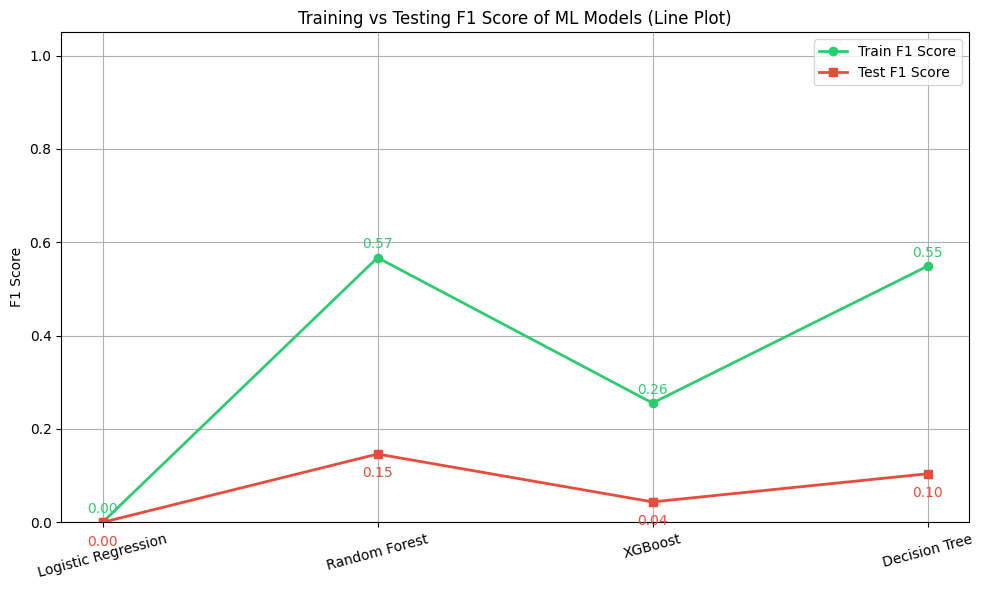

 Line plot saved at '../Images/train_vs_test_f1_score_line_plot.png'


In [33]:
#  Prepare models and names
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Decision Tree": dt_model
}

#  Collect F1 scores
train_scores = []
test_scores = []
model_names = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_scores.append(train_f1)
    test_scores.append(test_f1)
    model_names.append(name)

# Line Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))

plt.plot(x, train_scores, marker='o', label='Train F1 Score', color='#2ecc71', linewidth=2)
plt.plot(x, test_scores, marker='s', label='Test F1 Score', color='#e74c3c', linewidth=2)

# Annotations on points
for i in x:
    plt.text(i, train_scores[i] + 0.02, f"{train_scores[i]:.2f}", ha='center', color='#2ecc71')
    plt.text(i, test_scores[i] - 0.05, f"{test_scores[i]:.2f}", ha='center', color='#e74c3c')

# Formatting
plt.xticks(x, model_names, rotation=15)
plt.ylabel("F1 Score")
plt.ylim(0, 1.05)
plt.title("Training vs Testing F1 Score of ML Models (Line Plot)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Save the plot
output_folder = "../Images"
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, 'train_vs_test_f1_score_line_plot.png'))
plt.close()

print(" Line plot saved at '../Images/train_vs_test_f1_score_line_plot.png'")


### Save the Best Model

In [34]:
output_folder = '../Saved_Models'
os.makedirs(output_folder, exist_ok=True) 

model_path = os.path.join(output_folder, 'random_forest_model.pkl')

# Save the model
joblib.dump(rf_model, model_path)

print(f"Best model saved at: {model_path}")


Best model saved at: ../Saved_Models\random_forest_model.pkl


### Confusion Matrix of Best Model

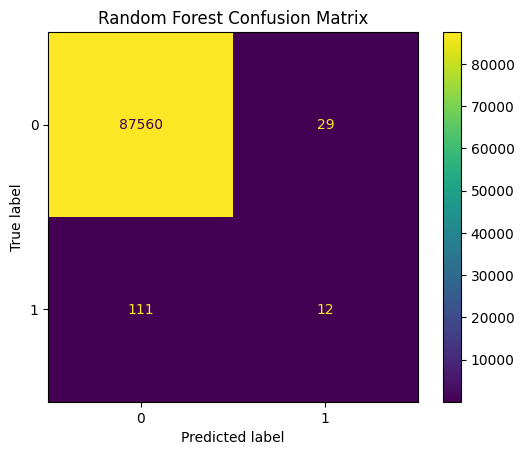

Graph saved successfully in '../Images\confusion_matrix_random_forest.png'


In [35]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

output_folder = '../Images'  
os.makedirs(output_folder, exist_ok=True)

filename = os.path.join(output_folder, 'confusion_matrix_random_forest.png')
plt.savefig(filename)
plt.close()

print(f"Graph saved successfully in '{filename}'")


### Comparison Plot of Different Models

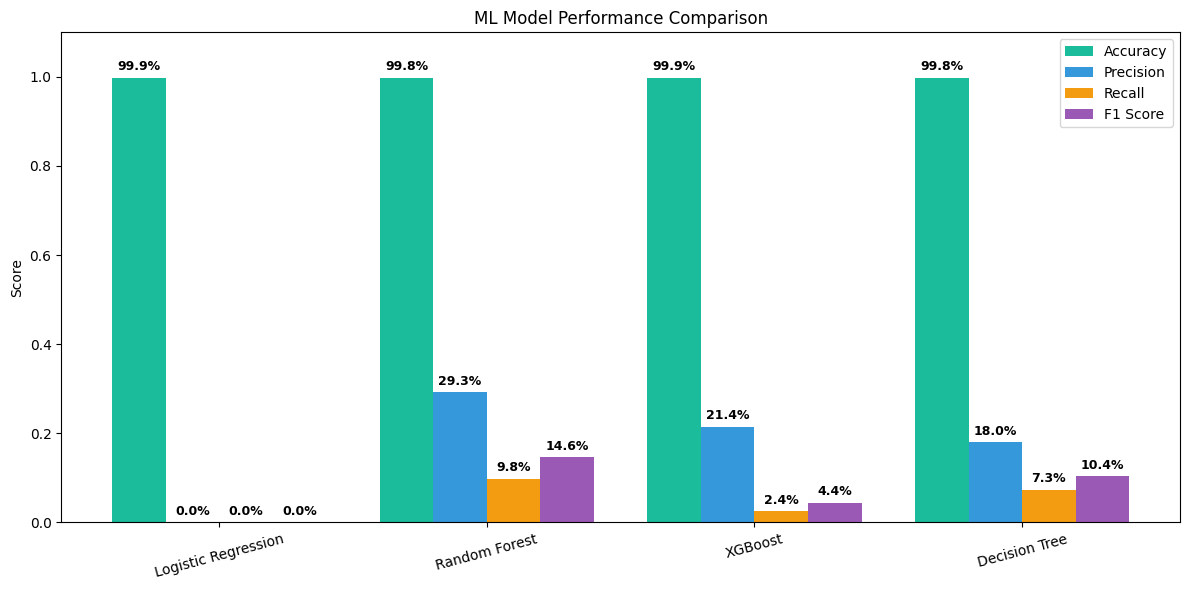

Graph saved successfully in '../Images\model_performance_comparison.png'


In [36]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Decision Tree": dt_model
}

# Collect metrics
metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))

# Create DataFrame
df_metrics = pd.DataFrame(metrics, index=models.keys())

# Plot settings
x = np.arange(len(df_metrics.index))  
width = 0.2  
colors = ['#1abc9c', '#3498db', '#f39c12', '#9b59b6']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(df_metrics.columns):
    bars = plt.bar(x + i * width - 1.5 * width, df_metrics[metric], width, label=metric, color=colors[i])
    
    # Add percentage labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height*100:.1f}%', 
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(x, df_metrics.index, rotation=15)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('ML Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

output_folder = '../Images'  
os.makedirs(output_folder, exist_ok=True)

filename = os.path.join(output_folder, 'model_performance_comparison.png')
plt.savefig(filename)
plt.close()

print(f"Graph saved successfully in '{filename}'")
